# Book Business

## Mission n° 1 : Nettoyage des données
*Faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes.*

In [110]:
# importer les libraires
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [71]:
# importer fichier csv
df_clients = pd.read_csv('clients.csv')
df_ventes = pd.read_csv('ventes.csv')
df_produits = pd.read_csv('produits.csv')

In [119]:
# anlysons le df_clients
df_clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [118]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [74]:
df_clients.duplicated().sum()

0

In [75]:
df_clients.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

Nous pouvons voir que le dataframe clients ne comporte aucune case vide ni de doublon.

In [76]:
# analyse de df_ventes
df_ventes.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [77]:
df_ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


In [78]:
df_ventes.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [79]:
df_ventes.duplicated().sum()

126

Pour df_ventes, nous n'avons pas de case vide, mais 126 lignes sur 337016, comportent des doublons. Voyons voir où se situe exactement ces doublons, interessons-nous donc aux différentes colonnes.

In [80]:
df_ventes.columns

Index(['id_prod', 'date', 'session_id', 'client_id'], dtype='object')

In [81]:
df_ventes.id_prod

0         0_1483
1          2_226
2          1_374
3         0_2186
4         0_1351
           ...  
337011     1_671
337012     0_759
337013    0_1256
337014     2_227
337015    0_1417
Name: id_prod, Length: 337016, dtype: object

In [82]:
df_ventes.id_prod.duplicated().value_counts()

True     333750
False      3266
Name: id_prod, dtype: int64

In [83]:
df_ventes.id_prod.isnull().sum()

0

In [84]:
df_ventes.date.duplicated().value_counts()

False    336855
True        161
Name: date, dtype: int64

In [85]:
df_ventes.date.isnull().sum()

0

In [87]:
df_ventes.session_id.isnull().sum()

0

In [31]:
df_ventes.session_id.duplicated().value_counts()

False    169195
True     167821
Name: session_id, dtype: int64

In [33]:
df_ventes.client_id.isnull().sum()

0

In [34]:
df_ventes.client_id.duplicated().value_counts()

True     328414
False      8602
Name: client_id, dtype: int64

In [36]:
len(df_ventes)

337016

In [51]:
df_ventes_final = df_ventes.drop_duplicates()

In [52]:
df_ventes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     336890 non-null  object
 1   date        336890 non-null  object
 2   session_id  336890 non-null  object
 3   client_id   336890 non-null  object
dtypes: object(4)
memory usage: 12.9+ MB


In [53]:
len(df_ventes_final)

336890

En analysant les différentes colonnes, nous avons vu qu'il y avait des doublons dans chaques colonnes. Mais en utilisant la méthodes " df_ventes.duplicated().sum() " nous n'obtenons que 126 doublons. Par ailleurs, la méthode " .drop_duplicates() " n'a supprimé que les 126 doublons et non tous les doublons des différentes colonnes. Nous pouvons considérer que ce que nous pensions être des doublons au départ ne l'étaient pas et que drop.duplicates() supprime les lignes identiques.

In [46]:
# analyse df_produits
df_produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [47]:
df_produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [48]:
df_produits.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [50]:
df_produits.duplicated().value_counts()

False    3287
dtype: int64

In [64]:
df_produits.loc[df_produits['price'] < 0 ]

,id_prod,price,categ
731,T_0,-1.0,0


In [91]:
df_produits.loc[df_produits['price'] < 1 ]

,id_prod,price,categ
145,0_1203,0.99,0
370,0_120,0.66,0
686,0_2138,0.93,0
731,T_0,-1.00,0
801,0_2166,0.97,0
848,0_180,0.97,0
946,0_2169,0.99,0
985,0_2275,0.99,0
991,0_1329,0.99,0
1211,0_1844,0.77,0


In [93]:
df_produits.price.max()

300.0

In [94]:
df_produits.categ.unique()

array([0, 1, 2], dtype=int64)

Nous pouvons voir que nous avons des prix très bas < à 1. Voyons si ces valeurs sont aberrantes ou non.

<AxesSubplot:>

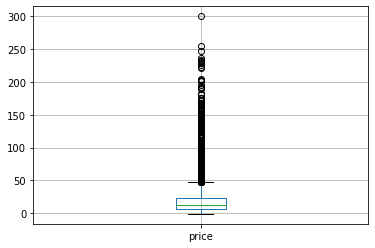

In [96]:
df_produits[['price']].boxplot()

In [98]:
df_produits.price.describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

Il n'y a pas de doublons ni de case vide dans ce dataframe. Cependant nous constatons la présence de valeurs aberrantes. En effet, la médiane 13.06 est très éloignée de la moyenne 21.86 .

L'écart-type est égale à 29.85 . Le coefficient de variation est égale à 1.36 (écart-type / moyenne). On peut donc en conclure que les valeurs sont très hétérogènes et très dispersées entre le min -1 et le max 300.

Notre boîte à moustache nous permet de présenter graphiquement les valeurs des équartiles : 25% des prix sont compris entre 0 et 6.99, 25% entre 6.99 et 13.06, 25% entre 13.06 et 22.99 et 25% entre 22.99 et environ 48. Les losanges représentent les valeurs extrêmes qui varient entre 48 et le max 300.

In [102]:
# Quantité de produits qui ont un prix > 50
df_produits.loc[df_produits['price'] > 50 ]

,id_prod,price,categ
10,2_228,225.17,2
11,1_178,51.92,1
38,2_100,72.11,2
64,2_89,107.99,2
73,2_225,157.99,2
...,...,...,...
3267,2_101,63.99,2
3269,1_543,51.99,1
3271,2_123,147.99,2
3279,1_331,55.99,1


In [103]:
# Quantité de produits ayant un prix < 50
df_produits.loc[df_produits['price'] < 50 ]

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,0_607,14.99,0
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


Nous devrions donc supprimer les données aberrantes ( > 50) ainsi que le prix qui est égale à -1. Mais ces prix > 50 sont-ils vraiment si aberrantes ?
C'est possible qu'il y ait des livres anciens ou autres qui valent une petite fortunes, donc nous allons garder ses valeurs >50 et supprimer uniquement le prix -1.

In [104]:
df_produits['price'].min()

-1.0

In [106]:
valeur_fausse = df_produits['price'].argmin()
valeur_fausse

731

In [107]:
df_produits = df_produits.drop(valeur_fausse).reset_index(drop=True) 

In [108]:
df_produits['price'].min()

0.62

<AxesSubplot:>

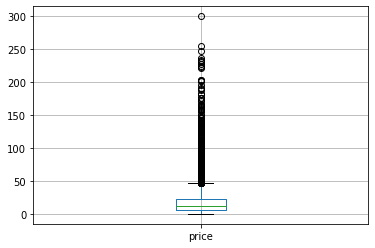

In [109]:
df_produits[['price']].boxplot()

Nous voilà donc en présence de 3 dataframe : df_clients, df_ventes_final et df_produits tout propres pour une analyse.

## Mission n° 2 : Analyse des données

*Une grande liberté vous est laissée sur ce plan, mais à vous de trouver les informations qui ont du sens pour mieux comprendre les ventes.*

### Liaison des dataframes

In [124]:
df_ventes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     336890 non-null  object
 1   date        336890 non-null  object
 2   session_id  336890 non-null  object
 3   client_id   336890 non-null  object
dtypes: object(4)
memory usage: 12.9+ MB


In [123]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [122]:
df_produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [112]:
df_ventes_produits = df_produits.merge(df_ventes_final)
df_ventes_produits.head()

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0,2021-05-12 23:26:29.885083,s_33709,c_7954
1,0_1421,19.99,0,2022-01-25 11:27:39.357012,s_154957,c_254
2,0_1421,19.99,0,2022-01-02 22:29:33.796003,s_144068,c_5770
3,0_1421,19.99,0,2021-03-05 17:10:40.265676,s_2187,c_1455
4,0_1421,19.99,0,2021-03-29 13:55:04.422637,s_13112,c_2768


In [113]:
df_ventes_produits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336713 entries, 0 to 336712
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336713 non-null  object 
 1   price       336713 non-null  float64
 2   categ       336713 non-null  int64  
 3   date        336713 non-null  object 
 4   session_id  336713 non-null  object 
 5   client_id   336713 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 18.0+ MB


In [120]:
df_ventes_produits_clients = df_ventes_produits.merge(df_clients)
df_ventes_produits_clients.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2021-05-12 23:26:29.885083,s_33709,c_7954,m,1973
1,0_1142,3.42,0,2021-03-24 00:54:59.507581,s_10590,c_7954,m,1973
2,0_1446,8.09,0,2021-11-26 18:04:33.019608,s_125461,c_7954,m,1973
3,0_2291,12.99,0,2021-05-29 18:25:02.094891,s_41299,c_7954,m,1973
4,1_385,25.99,1,2021-06-01 20:41:40.157683,s_42731,c_7954,m,1973


In [121]:
df_ventes_produits_clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336713 entries, 0 to 336712
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336713 non-null  object 
 1   price       336713 non-null  float64
 2   categ       336713 non-null  int64  
 3   date        336713 non-null  object 
 4   session_id  336713 non-null  object 
 5   client_id   336713 non-null  object 
 6   sex         336713 non-null  object 
 7   birth       336713 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 23.1+ MB


### Analyse de df_ventes_produits_clients

- Les indicateurs de tendance centrale et de dispersion :

In [127]:
df_ventes_produits_clients.describe()

,price,categ,birth
count,336713.000000,336713.000000,336713.000000
mean,17.215189,0.430156,1977.823568
std,17.855445,0.591082,13.524433
min,0.620000,0.000000,1929.000000
25%,8.610000,0.000000,1971.000000
50%,13.900000,0.000000,1980.000000
75%,18.990000,1.000000,1987.000000
max,300.000000,2.000000,2004.000000


In [128]:
df_ventes_produits_clients.sex.value_counts()

m    169198
f    167515
Name: sex, dtype: int64

In [131]:
df_ventes_produits_clients.price.describe()

count    336713.000000
mean         17.215189
std          17.855445
min           0.620000
25%           8.610000
50%          13.900000
75%          18.990000
max         300.000000
Name: price, dtype: float64

<AxesSubplot:>

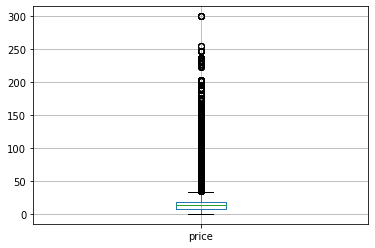

In [133]:
df_ventes_produits_clients[['price']].boxplot()

La médiane est de 13.90, et la moyenne 17.22 . La médiane étant assez éloignés de la moyenne, nous pouvons dire qu'il y a des valeurs extêmes dans notre dataframe.

Le coefficient de variation nous donne un pourcentage de 104% (17.85/17.21). Ceci confirme la présence de nombreuses valeurs extrêmes dans notre df, et montre une très grande dispersions de nos données par rapport à la moyenne.

25% des prix sont compris entre 0.62 et 8.61 ;
25% "     "     "      "  entre 8.61 et 13.9 ;
25% "     "     "      "  entre 13.9 et 19 ;
25%  "     "     "      " entre 19 et 40.


In [162]:
# Produits dont les prix sont < 40
Y = df_ventes_produits_clients.loc[df_ventes_produits_clients['price'] < 40 ]
Y

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2021-05-12 23:26:29.885083,s_33709,c_7954,m,1973
1,0_1142,3.42,0,2021-03-24 00:54:59.507581,s_10590,c_7954,m,1973
2,0_1446,8.09,0,2021-11-26 18:04:33.019608,s_125461,c_7954,m,1973
3,0_2291,12.99,0,2021-05-29 18:25:02.094891,s_41299,c_7954,m,1973
4,1_385,25.99,1,2021-06-01 20:41:40.157683,s_42731,c_7954,m,1973
...,...,...,...,...,...,...,...,...
336705,1_364,10.30,1,2021-04-08 04:09:57.291662,s_17555,c_855,m,1951
336706,1_278,19.18,1,2021-05-22 22:44:44.719955,s_38163,c_1970,m,2002
336707,0_1931,4.99,0,2022-01-06 01:45:15.759634,s_145605,c_1970,m,2002
336708,0_142,19.85,0,2021-09-25 18:07:25.880052,s_95415,c_1232,f,1960


In [159]:
# Produits dont les prix sont > 40
X = df_ventes_produits_clients.loc[df_ventes_produits_clients['price'] > 40 ]
X

,id_prod,price,categ,date,session_id,client_id,sex,birth
262,1_35,45.99,1,2021-04-02 04:16:53.540162,s_14766,c_5770,f,1977
522,2_1,56.99,2,2021-04-15 01:33:18.629293,s_20713,c_1508,f,1996
1113,2_46,41.31,2,2021-07-24 17:01:27.026839,s_66626,c_1609,m,1980
1607,1_564,62.99,1,2022-02-08 14:36:04.988885,s_161967,c_1609,m,1980
1608,1_564,62.99,1,2021-12-16 04:12:26.857565,s_135072,c_1609,m,1980
...,...,...,...,...,...,...,...,...
336695,2_110,62.25,2,2021-08-19 08:46:07.018249,s_77793,c_8005,f,1955
336697,2_135,68.99,2,2021-09-03 17:28:42.572885,s_84588,c_4934,m,1994
336709,2_181,57.99,2,2021-08-05 23:36:00.315963,s_71886,c_6837,f,1995
336711,2_163,68.99,2,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997


Sur 336713 produits, 19359 ont un prix > 40.

- Analyse de concentration : courbe de Lorenz et indice de Gini

In [156]:
df_ventes_produits_clients.categ.value_counts()

0    209426
1    109735
2     17552
Name: categ, dtype: int64

In [146]:
df_ventes_produits_clients['price'].argmax()

84520

In [158]:
df_ventes_produits_clients.loc[84520, 'categ']

2

In [160]:
X.categ.value_counts()

2    17449
1     1906
0        4
Name: categ, dtype: int64

In [161]:
17449 + 1906

19355

Les produits de 'categ' 2 ont majoritairement un prix > 40. 

In [163]:
Y.categ.value_counts()

0    209422
1    107829
2       103
Name: categ, dtype: int64